# Disclaimer (really important!)
- This is just my **second** data science project.
- **My goal** is to practice, showcase what I have already learned, and improve through feedback.
- I have dedicated a significant amount of time to complete this project. **If you have any tips or suggestions, I would be happy to hear them**.
- If you liked it, please leave an **upvote**. It's free and motivates me to post other projects.

# 1. Business Understanding

- In the "Business Understanding" phase of CRISP-DM, the goal is to fully comprehend the context and requirements of the business problem being addressed.
- This involves identifying success criteria, setting goals, and understanding the constraints and challenges involved.

## 1.1 Objective of this project
The primary purpose of this project was to develop a classification model capable of effectively identifying whether a sample of breast cells is benign or malignant based on the provided dataset's features. This could have important clinical implications, assisting doctors and specialists in making informed decisions regarding breast cancer diagnoses.

- [More information HERE](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)
- [And HERE](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

## 1.2 Data description

Here's a brief version of what you'll find in the data description file.

* **id** - ID number

* **diagnosis**- The diagnosis of breast tissues (M = malignant, B = benign)

* **radius_mean** - mean of distances from center to points on the perimeter

* **texture_mean** - standard deviation of gray-scale values

* **perimeter_mean** - mean size of the core tumor

* **area_mean** - 

* **smoothness_mean** - mean of local variation in radius lengths

* **compactness_mean** - mean of perimeter^2 / area - 1.0

* **concavity_mean** - mean of severity of concave portions of the contour

* **concave points_mean** - mean for number of concave portions of the contour

* **symmetry_mean** - 

* **fractal_dimension_mean** - mean for "coastline approximation" - 1

* **radius_se** - standard error for the mean of distances from center to points on the perimeter

* **texture_se**  - standard error for standard deviation of gray-scale values

* **perimeter_se** - 

* **area_se**  - 

* **smoothness_se**  - standard error for local variation in radius lengths

* **compactness_se**  - standard error for perimeter^2 / area - 1.0

* **concavity_se**  - standard error for severity of concave portions of the contour

* **concave points_se**  - standard error for number of concave portions of the contour

* **symmetry_se**  - 

* **fractal_dimension_se**  - standard error for "coastline approximation" - 1

* **radius_worst**  - "worst" or largest mean value for mean of distances from center to points on the perimeter

* **texture_worst** - "worst" or largest mean value for standard deviation of gray-scale values

* **perimeter_worst** - 

* **area_worst** - 

* **smoothness_worst** - "worst" or largest mean value for local variation in radius lengths

* **compactness_worst** - "worst" or largest mean value for perimeter^2 / area - 1.0

* **concavity_worst** - "worst" or largest mean value for severity of concave portions of the contour

* **concave points_worst** - "worst" or largest mean value for number of concave portions of the contour

* **symmetry_worst**

* **fractal_dimension_worst** - "worst" or largest mean value for "coastline approximation" - 1

# 2. Data Understanding

- In the "Data Understanding" phase of CRISP-DM, the goal is to explore and comprehend the available data.
- This involves analyzing data quality, identifying patterns, understanding variable distribution, and evaluating the relevance of the contained information.

## 2.1 - Importing the libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## 2.2 - Helper functions

In [73]:
def percent_missing(df):
    missing = df.isnull().sum()
    percent_missing = missing / data.shape[0] * 100
    print(percent_missing);

    
def missing_heatmap(df):
    plt.figure(figsize=(20,10))
    sns.heatmap(df.isnull(), cmap='coolwarm')
    plt.show();

    
def corrwith(df1, df2, column):
    df1.corrwith(df2[column]).plot.bar(
    figsize=(20,10), title=f'Level of correlation with {column}', grid=True
    );

    
def heatmap(df):
    plt.figure(figsize=(30,30))
    sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidth=1);

    
def limits(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5 * iqr, q3 + 1.5 * iqr


def countplot(column, x_tick_rotation=False, x_rotation=90):
    print(column.value_counts())
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column)
    if x_tick_rotation:
        ax.tick_params(axis='x', rotation=x_rotation)


def how_many_outliers(df, column):
    inf_lim, sup_lim = limits(df[column])
    inf = df.loc[df[column] < inf_lim].shape[0]
    sup = df.loc[df[column] > sup_lim].shape[0]
    total = inf + sup
    return inf, sup, total
    

def remove_outliers(df, column):
    n_of_rows = df.shape[0]
    inf_lim, sup_lim = limits(df[column])
    df = df.loc[(df[column] >= inf_lim) & (df[column] <= sup_lim), :]
    removed_rows = n_of_rows - df.shape[0]
    return df, removed_rows



### Loading the Data

In [37]:
pd.set_option('display.max_columns', None)
data = pd.read_csv(r'C:\Users\Henrique\Desktop\0Machine Learning & Deep Learning Projects for Beginners (TutsNode.net) 2023\02 - Project 1 Breast Cancer Detection/data.csv')

In [38]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Checking the shape (lines, columns) of the data

In [39]:
print(f'There are {data.shape[0]} lines and {data.shape[1]} columns in this dataset.')

There are 569 lines and 33 columns in this dataset.


### Checking the column name, non-null count and Dtypes

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Verifying the percentage of missing values

In [41]:
percent_missing(data)

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

### Checking the missing values visually.
- Red values represent missing values.
- Blue values represent non-missing data.

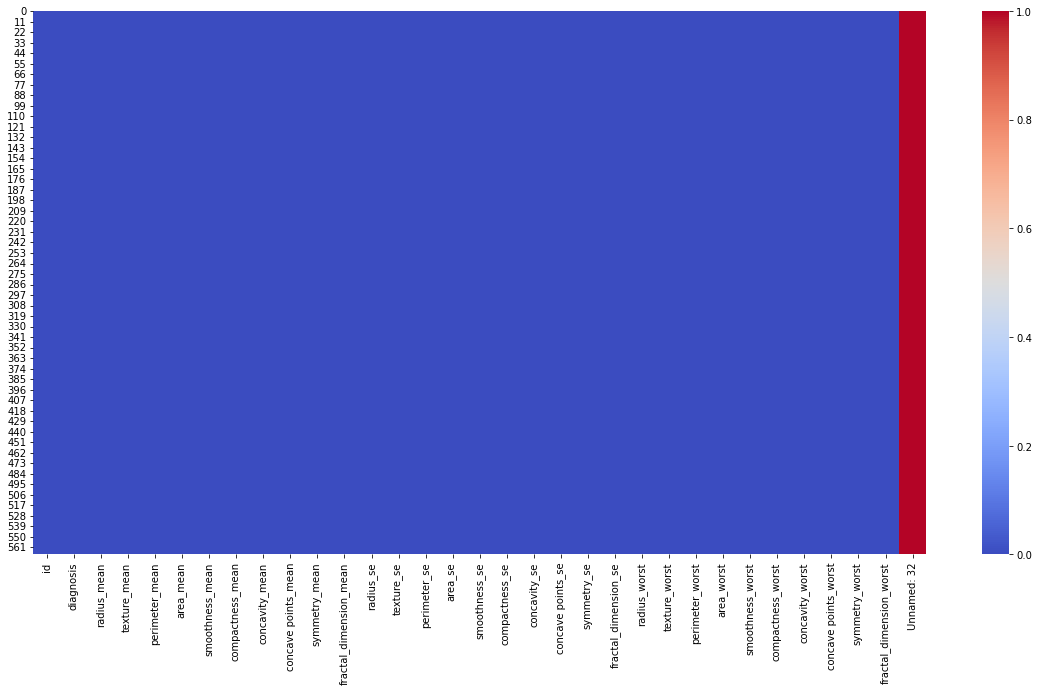

In [42]:
missing_heatmap(data)

### Selecting all columns with categorical variables

In [43]:
cat_cols = data.select_dtypes(include=["object"]).columns
print(cat_cols)

Index(['diagnosis'], dtype='object')


In [44]:
total_num = len(cat_cols)
print(f'Total columns with categorical variables: {total_num}')

Total columns with categorical variables: 1


### Selecting all columns with numerical variables

In [45]:
num_cols = data.select_dtypes(include=["int64","float64"]).columns
print(num_cols)

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [46]:
total_cat = len(num_cols)
print(f'Total columns with categorical variables: {total_cat}')

Total columns with categorical variables: 32


### Statistical summary

In [47]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [48]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# 3. Data Preparation

- In the "Data Preparation" phase of CRISP-DM, the goal is to perform necessary transformations on the data so that they can be used in the modeling phase.
- This includes handling missing data, scaling normalization, selecting relevant variables, and other preparation steps.

### Dealing with the missing values

In [49]:
print(f'Are there any null values? {data.isnull().values.any()}.')

Are there any null values? True.


In [50]:
print(f'How many null values? {data.isnull().values.sum()}.')

How many null values? 569.


In [51]:
null_col = data.columns[data.isnull().any()]
print(f'Which columns have null values? {null_col}')

Which columns have null values? Index(['Unnamed: 32'], dtype='object')


In [52]:
print(f'How many columns with null values? {len(null_col)}.')

How many columns with null values? 1.


In [53]:
# All values of this columns are null values
data['Unnamed: 32'].count()

0

### Here we are going to delete the 'Unnamed: 32' column that has all null values.

In [54]:
data.drop('Unnamed: 32', axis=1, inplace=True)

In [55]:
data.shape

(569, 32)

In [56]:
print(f'Are there any null values? {data.isnull().values.any()}.')

Are there any null values? False.


### Checking if there are still any null values

In [57]:
percent_missing(data)

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

### Here we will print the column name and its respective Dtype. Below, we will display the column name with the first value.

In [58]:
print(data.dtypes)
print('-'*50)
print(data.iloc[0])

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### Checking the correlations of the columns with the target variable 'diagnosis'.
- To do this, we will create a copy of the dataframe, turn into dummies and remove the target column.

In [59]:
data_copy = data.copy()
data_copy = pd.get_dummies(data=data_copy, drop_first=True)
data2 = data.drop('diagnosis', axis=1)

In [60]:
data_copy.shape

(569, 32)

In [61]:
data2.shape

(569, 31)

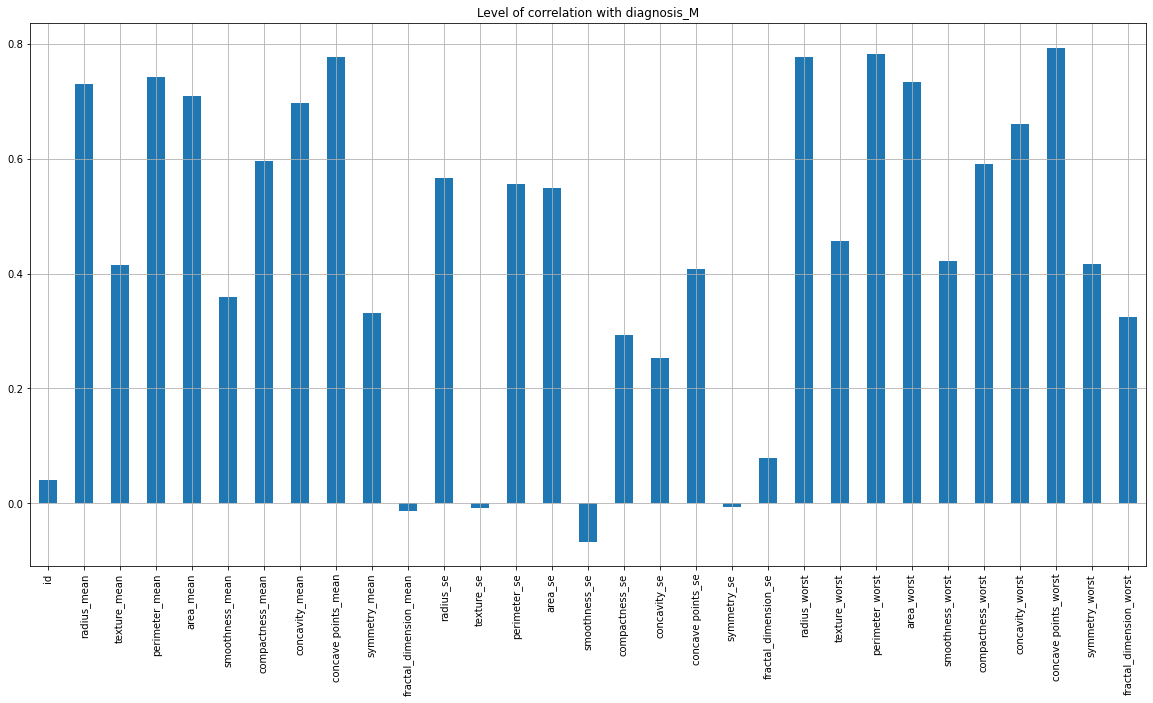

In [62]:
corrwith(data2, data_copy, 'diagnosis_M')

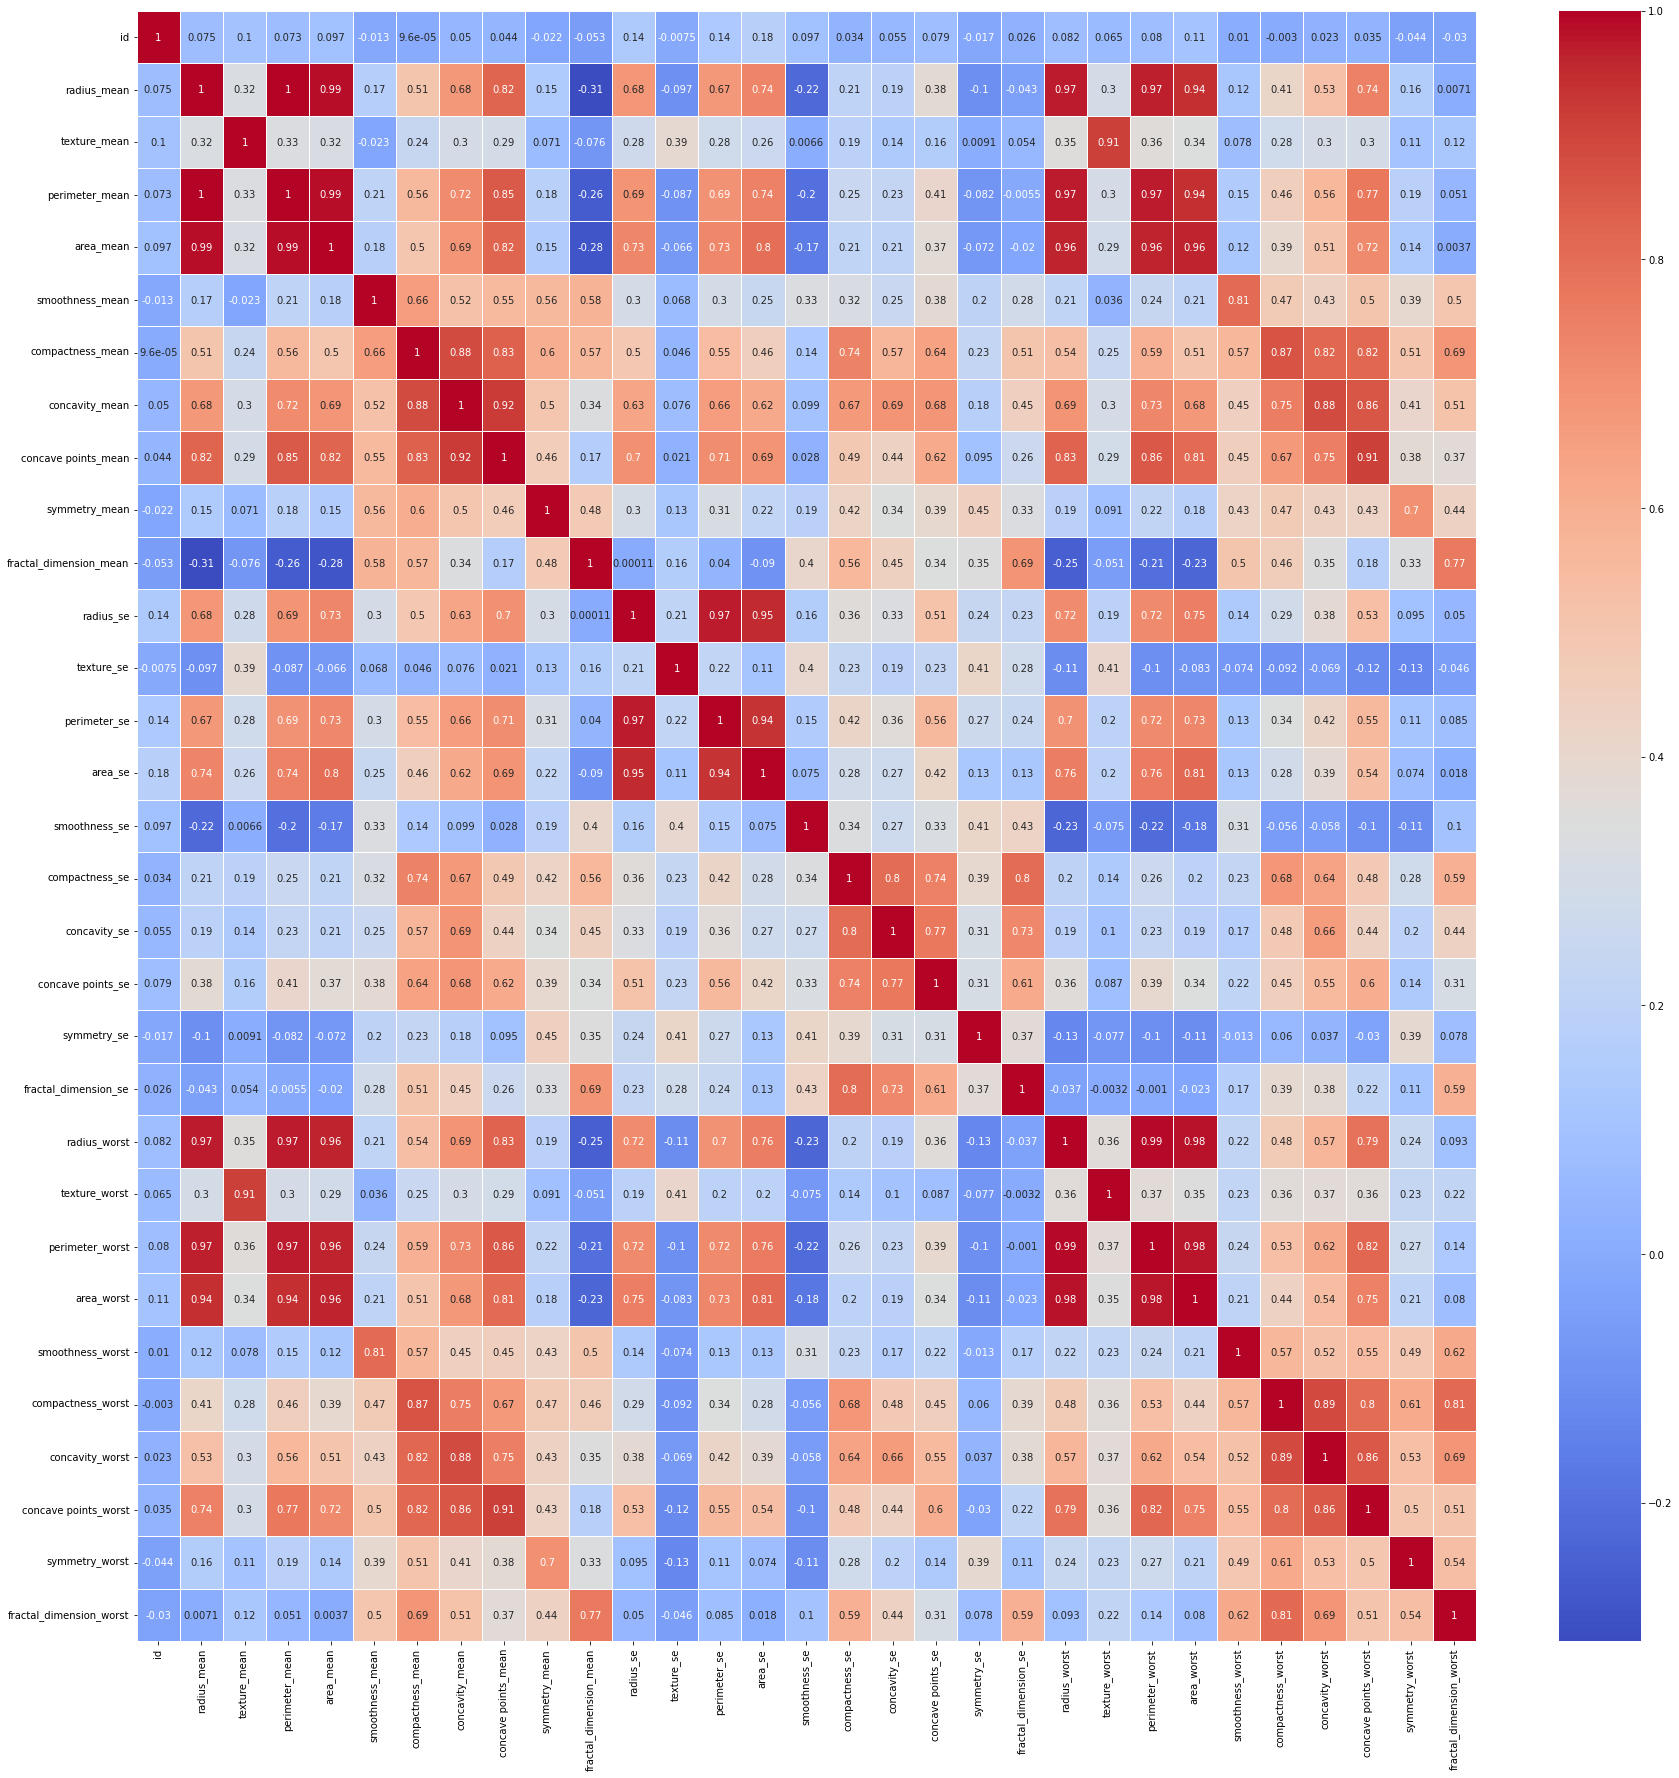

In [63]:
heatmap(data)

As we can see, we have several highly correlated columns. For now, we will use all of them. In the end, we will remove them and assess the performance of our model.

Highly correlated columns:
- 'radius_mean' with 'perimeter_mean' - 0.997855
- 'radius_mean' with 'area_mean' - 0.987357
- 'perimeter_mean' with 'area_mean' - 0.986507
- 'compactness_mean' with 'concavity_mean' - 0.883121
- 'concavity_mean' with 'concave points_mean' - 0.921391
- 'radius_se' with 'perimeter_se' - 0.972794
-  'radius_se' with 'area_se' - 0.951830
- 'area_se' with 'perimeter_se' - 0.937655
- 'radius_worst' with 'perimeter_worst' - 0.993708
- 'area_worst' with 'radius_worst' - 0.984015
- 'perimeter_worst' with 'area_worst' - 0.977578
- 'compactness_worst' with 'concavity_worst' - 0.892261	
- 'concavity_worst' with 'concave points_worst' - 0.855434	

## Let's analyze and decide whether we will remove the outliers or not.
- We don't have a very large amount of data (569). If we remove outliers from all columns, we will lose a lot of information. 
- If we remove the outliers only from the two or three columns with the highest amount (my original idea), we will have to discard a very large amount of data as well. Thus, we will remove the outliers only from the column that has the largest amount.

In [64]:
data.shape

(569, 32)

### 'id'
- Let's eliminate the 'id' column. It will be irrelevant for our model.

In [65]:
data.drop('id', axis=1, inplace=True)
data.shape

(569, 31)

### 'diagnosis'
- The diagnosis of breast tissues (M = malignant, B = benign)
- This is our target.

B    357
M    212
Name: diagnosis, dtype: int64


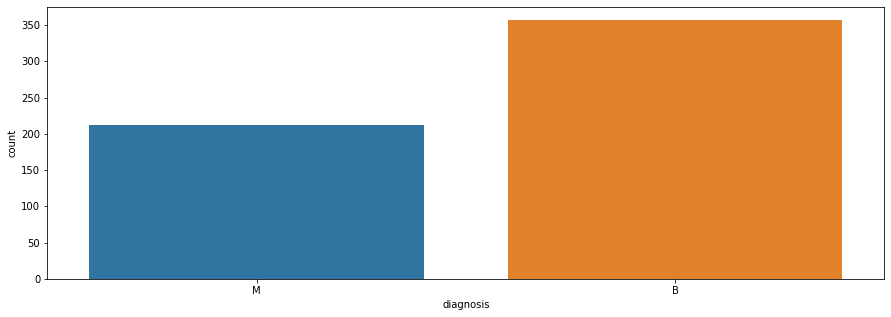

In [66]:
countplot(data['diagnosis'])

### Checking the number of outliers in each column.

In [71]:
for column in data.columns:
    if column == 'diagnosis':
        continue
    inf, sup, total = how_many_outliers(data, column)
    print(f'{column}: {total} outliers.')

radius_mean: 14 outliers.
texture_mean: 7 outliers.
perimeter_mean: 13 outliers.
area_mean: 25 outliers.
smoothness_mean: 6 outliers.
compactness_mean: 16 outliers.
concavity_mean: 18 outliers.
concave points_mean: 10 outliers.
symmetry_mean: 15 outliers.
fractal_dimension_mean: 15 outliers.
radius_se: 38 outliers.
texture_se: 20 outliers.
perimeter_se: 38 outliers.
area_se: 65 outliers.
smoothness_se: 30 outliers.
compactness_se: 28 outliers.
concavity_se: 22 outliers.
concave points_se: 19 outliers.
symmetry_se: 27 outliers.
fractal_dimension_se: 28 outliers.
radius_worst: 17 outliers.
texture_worst: 5 outliers.
perimeter_worst: 15 outliers.
area_worst: 35 outliers.
smoothness_worst: 7 outliers.
compactness_worst: 16 outliers.
concavity_worst: 12 outliers.
concave points_worst: 0 outliers.
symmetry_worst: 23 outliers.
fractal_dimension_worst: 24 outliers.


- As we can see, the column with the most outliers (65) is 'area_se'. Let's remove the outliers.

In [74]:
data, outliers_removed = remove_outliers(data, 'area_se')
print(f'{outliers_removed} outliers removed.')

65 outliers removed.


### Encoding
- Now let's convert categorical data into a numerical format that can be used by our machine learning algorithms.

- Checking our target before the encoding.

B    357
M    147
Name: diagnosis, dtype: int64


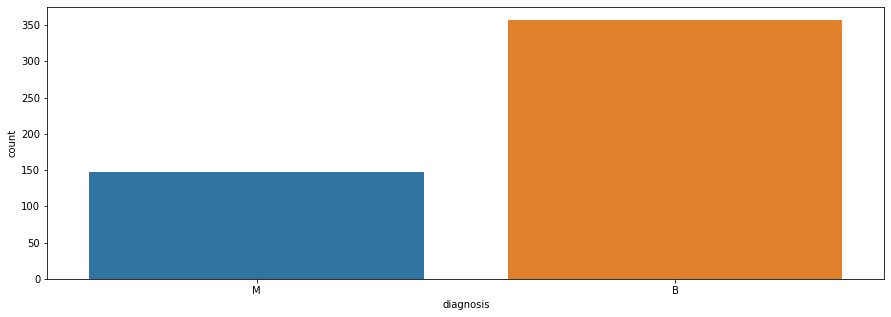

In [75]:
countplot(data['diagnosis'])

In [76]:
cat_cols

Index(['diagnosis'], dtype='object')

In [77]:
data['diagnosis'].value_counts()

B    357
M    147
Name: diagnosis, dtype: int64

### Performing encoding with 'pd.get_dummies'

In [78]:
data = pd.get_dummies(data=data, drop_first=True)

In [79]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,1


Now our target is:

- 0 correponds to B (benign)
- 1 corresponds to M (malignant)

0    357
1    147
Name: diagnosis_M, dtype: int64


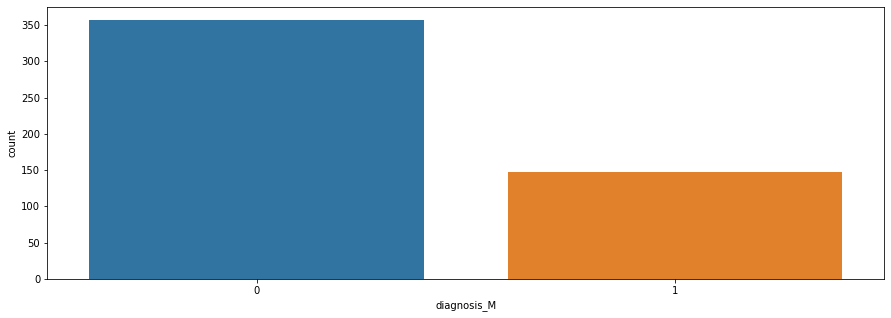

In [80]:
countplot(data['diagnosis_M'])

### Train x Test
- Splitting the data into X and y

In [81]:
X = data.iloc[:, 0:-1 ]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [82]:
X_train.shape

(352, 30)

In [83]:
y_train.shape

(352,)

In [84]:
X_test.shape

(152, 30)

In [85]:
y_test.shape

(152,)

### Feature Scaling
- Let's normalize the features of our dataset so that they are on the same scale, improving the performance of the ML algorithms.

In [86]:
scaler = StandardScaler()

In [87]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
X_train

array([[-0.89153707, -1.47261686, -0.95155483, ..., -1.05661527,
        -0.20745529, -0.37085223],
       [-0.17656882,  0.85016061, -0.0513385 , ...,  1.66815437,
         0.95311939,  2.44334033],
       [-0.5210872 , -1.05367407, -0.43978429, ..., -0.69674654,
        -0.22653798,  1.21565253],
       ...,
       [-1.32199981, -1.71803305, -1.35629905, ..., -1.73759235,
         0.42921273, -0.0944742 ],
       [-1.74431266,  0.51550217, -1.71377783, ..., -1.25903067,
         0.19848563, -0.35483891],
       [ 1.56825005,  0.10399624,  1.5698115 , ...,  1.60269237,
         0.12215486, -0.2629106 ]])

In [89]:
X_test

array([[-1.30755227, -0.47359944, -1.28784566, ..., -0.81871258,
        -0.56308729,  0.09353403],
       [ 0.5791489 , -0.55292589,  0.67557126, ...,  1.75428858,
         1.26191205,  1.38764744],
       [-0.59888167,  1.37321936, -0.53431515, ...,  0.51567862,
        -0.09469392,  0.98434904],
       ...,
       [-0.11359235,  0.72373409,  0.07035641, ...,  1.81113716,
         2.63760072,  1.42916346],
       [ 0.61619389, -0.48351525,  0.54409729, ..., -0.27589478,
        -0.78687523, -1.11636119],
       [ 0.06051909, -1.1999322 ,  0.06057736, ...,  0.5621911 ,
         0.64085714,  0.60240172]])

### PCA - Principal Component Analysis
- The use of PCA (Principal Component Analysis) in this project is justified by the need to reduce the dimensionality of the data set.' With 30 initial features, applying PCA allows condensing this information into a smaller number of principal components while preserving most of the data's variance. This not only simplifies data processing and analysis but also helps to avoid multicollinearity issues, making the classification model more robust. Additionally, PCA can reveal which features are most important in discriminating between benign and malignant classes, contributing to the predictive model's effectiveness.

In [90]:
n_components=15
pca = PCA(n_components=n_components) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


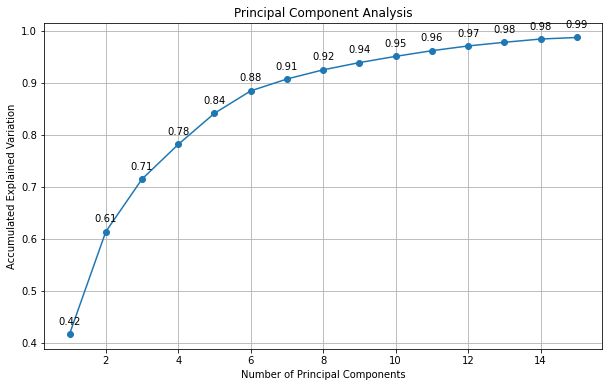

In [91]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plote a variação explicada acumulada em relação ao número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accumulated Explained Variation')
plt.title('Principal Component Analysis')
plt.grid(True)
for i, explained_var in enumerate(cumulative_explained_variance):
    plt.annotate(f'{explained_var:.2f}', (i + 1, explained_var), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

# 4. **Modeling**:

- In the "Modeling" phase of CRISP-DM, the main focus is to build machine learning models to solve the problem.
- This phase involves selecting the modeling algorithm, training, and evaluating the model.

### Model Evaluation

In [92]:
def evaluate_model(model, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    metrics_dict = {
        "Model": model,
        "Accuracy Score": accuracy,
        "F1 Score": f1,
        "Precision Score": precision,
        "Recall Score": recall
    }
    
    return metrics_dict

### Model Selection

In [93]:
metrics = pd.DataFrame(columns=['Model', 'Accuracy Score', 'F1 Score', 'Precision Score', 'Recall Score'])

In [94]:
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()
model_ab = AdaBoostClassifier()
model_knn = KNeighborsClassifier()
model_nb = GaussianNB()

models = {'Logistic Regression': model_lr,
         'Random Forest': model_rf,
          'AdaBoost': model_ab,
          'KNN': model_knn,
          'Naive Bayes':model_nb
         }

for model_name, model in models.items():
    # Get the actual model from the dictionary
    ml_model = models[model_name]
    
    ml_model.fit(X_train_pca, y_train)
    y_pred = ml_model.predict(X_test_pca)
    
    # Calculate metrics
    metrics_dict = evaluate_model(model_name, y_test, y_pred)
    
    # Add results to DataFrame
    metrics = pd.concat([metrics, pd.DataFrame([metrics_dict])], ignore_index=True)

In [95]:
# Display the models DataFrame
metrics

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.986842,0.978261,1.0,0.957447
1,Random Forest,0.973684,0.955556,1.0,0.914894
2,AdaBoost,0.940789,0.903226,0.913043,0.893617
3,KNN,0.973684,0.955556,1.0,0.914894
4,Naive Bayes,0.953947,0.923077,0.954545,0.893617


Let's arrange them in descending order by R² Score.

In [96]:
metrics.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.986842,0.978261,1.0,0.957447
1,Random Forest,0.973684,0.955556,1.0,0.914894
3,KNN,0.973684,0.955556,1.0,0.914894
4,Naive Bayes,0.953947,0.923077,0.954545,0.893617
2,AdaBoost,0.940789,0.903226,0.913043,0.893617


# 5. **Evaluation**:

- In the "Evaluation" phase of CRISP-DM, the goal is to assess the performance of the model built in the previous phase.
- This involves model validation using appropriate metrics, interpreting the results, and verifying if the model meets the established success criteria.

- Let's check our models before the parameter tuning.

In [97]:
metrics

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.986842,0.978261,1.0,0.957447
1,Random Forest,0.973684,0.955556,1.0,0.914894
2,AdaBoost,0.940789,0.903226,0.913043,0.893617
3,KNN,0.973684,0.955556,1.0,0.914894
4,Naive Bayes,0.953947,0.923077,0.954545,0.893617


### Hyperparameter tuning

#### Logistic Regression

In [116]:
def logistic_regressor_tuning(X, y):
    # Kfold
    kfold = KFold(n_splits=5)
    
    # GridSearchCV parameters
    penalty = ['l1', 'l2', 'elasticnet', None]
    tol = np.array([0.00001, 0.0001, 0.001, 0.01, 0,1])
    C = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
    solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    max_iter = np.array([90, 100, 110])
    warm_start = [True, False]
    param_grid = {'penalty':penalty, 'tol':tol, 'C':C, 'solver':solver, 'max_iter':max_iter, 'warm_start':warm_start}
    
    # ML Model
    logistic = LogisticRegression()
    
    # GridSearchCV
    grid_logistic = GridSearchCV(logistic, param_grid=param_grid, cv=kfold, n_jobs=3)
    grid_logistic.fit(X, y)
    
    # Predictions
    y_pred = grid_logistic.predict(X)
    
    # Metrics calculation
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    confusion = confusion_matrix(y, y_pred)
    
    # Result
    print('BEST RESULTS:')
    print(f'Best score: {grid_logistic.best_score_}')
    print(f'Accuracy: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Precision Score: {precision}')
    print(f'Recall Score: {recall}')
    print(f'Best estimators: {grid_logistic.best_estimator_}')
    print(f'Confusion Matrix: \n{confusion}')

In [117]:
logistic_regressor_tuning(X_train_pca, y_train)

BEST RESULTS:
Best score: 0.9716297786720322
Accuracy: 0.9772727272727273
F1 Score: 0.9587628865979382
Precision Score: 0.9893617021276596
Recall Score: 0.93
Best estimators: LogisticRegression(C=1.2, max_iter=90, solver='liblinear', tol=1.0,
                   warm_start=True)
Confusion Matrix: 
[[251   1]
 [  7  93]]


C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


15600 fits failed out of a total of 21600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    ra

#### Random Forest

In [118]:
def random_forest_tuning(X, y):
    # Kfold
    kfold = KFold(n_splits=5)
    
    # GridSearchCV parameters
    n_estimators= np.array([90, 100, 110])
    criterion = ['gini', 'entropy', 'log_loss']
    max_depth = np.array([2, 3, 4])
    min_samples_split = np.array([2, 3, 4])
    bootstrap= [True, False]
    warm_start = [True, False]
    param_grid = {'n_estimators':n_estimators, 'criterion':criterion, 'max_depth':max_depth, 'min_samples_split':min_samples_split, 'bootstrap':bootstrap ,'warm_start':warm_start}
    
    # ML Model
    random_forest = RandomForestClassifier()
    
    # GridSearchCV
    grid_rf = GridSearchCV(random_forest, param_grid=param_grid, cv=kfold, n_jobs=3)
    grid_rf.fit(X, y)
    
    # Predictions
    y_pred = grid_rf.predict(X)
    
    # Metrics calculaiton
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    confusion = confusion_matrix(y, y_pred)
    
    # Result
    print('BEST RESULTS:')
    print(f'Best score: {grid_rf.best_score_}')
    print(f'Accuracy Score: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Precision Score: {precision}')
    print(f'Recall Score: {recall}')
    print(f'Best estimators: {grid_rf.best_estimator_}')
    print(f'Confusion Matrix: \n{confusion}')

In [119]:
random_forest_tuning(X_train_pca, y_train)

C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Henrique\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Henrique\anaconda3\

BEST RESULTS:
Best score: 0.9433400402414487
Accuracy Score: 0.9772727272727273
F1 Score: 0.9583333333333334
Precision Score: 1.0
Recall Score: 0.92
Best estimators: RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=3,
                       n_estimators=90, warm_start=True)
Confusion Matrix: 
[[252   0]
 [  8  92]]


### Adaboost

In [121]:
def random_adaboost_tuning(X, y):
    # Kfold
    kfold = KFold(n_splits=5)
    
    # GridSearchCV parameters
    n_estimators=np.array([40, 50, 60, 70, 80])
    learning_rate = np.array([0.8, 0.9, 1.0])
    algorithm = ['SAMME', 'SAMME.R']
    param_grid = {'n_estimators':n_estimators, 'learning_rate':learning_rate, 'algorithm':algorithm}
    
    # ML Model
    adaboost = AdaBoostClassifier()
    
    # GridSearchCV
    grid_ab = GridSearchCV(adaboost, param_grid=param_grid, cv=kfold, n_jobs=3)
    grid_ab.fit(X, y)
    
    # Predictions
    y_pred = grid_ab.predict(X)
    
    # Metrics calculaiton
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    confusion = confusion_matrix(y, y_pred)
    
    # Result
    print('BEST RESULTS:')
    print(f'Best score: {grid_ab.best_score_}')
    print(f'Accuracy Score: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Precision Score: {precision}')
    print(f'Recall Score: {recall}')
    print(f'Best estimators: {grid_ab.best_estimator_}')
    print(f'Confusion Matrix: \n{confusion}')

In [122]:
random_adaboost_tuning(X_train_pca, y_train)

BEST RESULTS:
Best score: 0.9461971830985917
Accuracy Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
Best estimators: AdaBoostClassifier(algorithm='SAMME', learning_rate=0.8, n_estimators=60)
Confusion Matrix: 
[[252   0]
 [  0 100]]


### KNN

In [124]:
def knn_tuning(X, y):
    # Kfold
    kfold = KFold(n_splits=5)
    
    # GridSearchCV parameters
    n_neighbors=np.array([4, 5, 6, 7])
    weights = ['uniform', 'distance']
    algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
    leaf_size = np.array([25, 30, 35])
    param_grid = {'n_neighbors':n_neighbors, 'weights':weights, 'algorithm':algorithm, 'leaf_size':leaf_size}
    
    # ML Model
    knn = KNeighborsClassifier()
    
    # GridSearchCV
    grid_knn = GridSearchCV(knn, param_grid=param_grid, cv=kfold, n_jobs=3)
    grid_knn.fit(X, y)
    
    # Predictions
    y_pred = grid_knn.predict(X)
    
    # Metrics calculaiton
    accuracy = accuracy_score(y, y_pred) 
    f1 =f1_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    confusion = confusion_matrix(y, y_pred)
    
    # Result
    print('BEST RESULTS:')
    print(f'Best score: {grid_knn.best_score_}')
    print(f'Accuracy Score: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Precision Score: {precision}')
    print(f'Recall Score: {recall}')
    print(f'Best estimators: {grid_knn.best_estimator_}')
    print(f'Confusion Matrix: \n{confusion}')

In [125]:
knn_tuning(X_train_pca, y_train)

BEST RESULTS:
Best score: 0.9603621730382293
Accuracy Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
Best estimators: KNeighborsClassifier(leaf_size=25, n_neighbors=6, weights='distance')
Confusion Matrix: 
[[252   0]
 [  0 100]]


### Naive Bayes

In [126]:
def naive_bayes_tuning(X, y):
    # Kfold
    kfold = KFold(n_splits=5)
    
    # GridSearchCV parameters
    var_smoothing=np.array([1e-06, 1e-07, 1e-08, 1e-09, 1e-10])
    param_grid = {'var_smoothing':var_smoothing}
    
    # ML Model
    naive_bayes = GaussianNB()
    
    # GridSearchCV
    grid_nb = GridSearchCV(naive_bayes, param_grid=param_grid, cv=kfold, n_jobs=3)
    grid_nb.fit(X, y)
    
    # Predictions
    y_pred = grid_nb.predict(X)
    
    # Metrics calculaiton
    accuracy = accuracy_score(y, y_pred) 
    f1 =f1_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    confusion = confusion_matrix(y, y_pred)
    
    # Result
    print('BEST RESULTS:')
    print(f'Best score: {grid_nb.best_score_}')
    print(f'Accuracy Score: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Precision Score: {precision}')
    print(f'Recall Score: {recall}')
    print(f'Best estimators: {grid_nb.best_estimator_}')
    print(f'Confusion Matrix: \n{confusion}')

In [127]:
naive_bayes_tuning(X_train_pca, y_train)

BEST RESULTS:
Best score: 0.9206841046277667
Accuracy Score: 0.9346590909090909
F1 Score: 0.8795811518324608
Precision Score: 0.9230769230769231
Recall Score: 0.84
Best estimators: GaussianNB(var_smoothing=1e-06)
Confusion Matrix: 
[[245   7]
 [ 16  84]]


### Now it's time to add the best parameters we found to our models, evaluate and choose the best one.

In [136]:
best_metrics = pd.DataFrame(columns=['Model', 'Accuracy Score', 'F1 Score', 'Precision Score', 'Recall Score'])

In [137]:
model_lr = LogisticRegression(C=1.2, max_iter=90, solver='liblinear', tol=1.0, warm_start=True)
model_rf = RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=3, n_estimators=90, warm_start=True)
model_ab = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.8, n_estimators=60)
model_knn = KNeighborsClassifier(leaf_size=25, n_neighbors=6, weights='distance')
model_nb = GaussianNB(var_smoothing=1e-06)

models = {'Logistic Regression': model_lr,
         'Random Forest': model_rf,
          'AdaBoost': model_ab,
          'KNN': model_knn,
          'Naive Bayes':model_nb
         }

for model_name, model in models.items():
    ml_model = models[model_name]
    
    ml_model.fit(X_train_pca, y_train)
    y_pred = ml_model.predict(X_test_pca)
    
    # Calculate metrics
    metrics_dict = evaluate_model(model_name, y_test, y_pred)
    
    # Add results to DataFrame
    best_metrics = pd.concat([best_metrics, pd.DataFrame([metrics_dict])], ignore_index=True)

In [138]:
best_metrics

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.986842,0.978261,1.0,0.957447
1,Random Forest,0.960526,0.933333,0.976744,0.893617
2,AdaBoost,0.940789,0.905263,0.895833,0.914894
3,KNN,0.973684,0.955556,1.0,0.914894
4,Naive Bayes,0.953947,0.923077,0.954545,0.893617


### Let's visualize the result in some plots

In [139]:
# Create the bar plot for Accuracy Score
accuracy_plot = go.Figure()

for model_name in best_metrics['Model']:
    model_accuracy = best_metrics[best_metrics['Model'] == model_name]['Accuracy Score'].values[0]
    accuracy_plot.add_trace(
        go.Bar(x=[model_name], y=[model_accuracy], text=[f'{model_accuracy}'], name=model_name)
    )

# Update the layout
accuracy_plot.update_layout(
    title='Accuracy Score Comparison (higher is better)',
    xaxis_title='Model',
    yaxis_title='Accuracy Score',
    #xaxis=dict(tickangle=45),
    height=800
)

In [140]:
# Create the bar plot for F1 Score

f1_score_plot = go.Figure()

for model_name in best_metrics['Model']:
    # Y axis
    model_f1 = best_metrics[best_metrics['Model'] == model_name]['F1 Score'].values[0]
    f1_score_plot.add_trace(
        go.Bar(x=[model_name], y=[model_f1], text=[f'{model_f1}'], name=model_name)
    )

# Update the layout
f1_score_plot.update_layout(
    title='F1 Score Comparison',
    xaxis_title='Model',
    yaxis_title='F1 Score',
    height=800
)

In [141]:
# Create the bar plot for Precision Score
precision_score_plot = go.Figure()

for model_name in best_metrics['Model']:
    # Y axis
    model_precision = best_metrics[best_metrics['Model'] == model_name]['Precision Score'].values[0]
    precision_score_plot.add_trace(
        go.Bar(x=[model_name], y=[model_precision], text=[f'{model_precision}'], name=model_name)
    )

# Update the layout
precision_score_plot.update_layout(
    title='Precision Score Comparison (higher is better)',
    xaxis_title='Model',
    yaxis_title='Precision Score',
    height=800
)

In [142]:
# Create the bar plot for Recall Score
recall_score_plot = go.Figure()

for model_name in best_metrics['Model']:
    # Y axis 
    model_recall = best_metrics[best_metrics['Model'] == model_name]['Recall Score'].values[0]
    recall_score_plot.add_trace(
        go.Bar(x=[model_name], y=[model_recall], text=[f'{model_recall}'], name=model_name)
    )

# Update the layout
recall_score_plot.update_layout(
    title='Recall Score Comparison',
    xaxis_title='Model',
    yaxis_title='Recall Score',
    height=800
)

### I will choose LOGISTIC REGRESSION the algorithm.

- The choice of the Logistic Regression algorithm is supported by it has a high accuracy and a high F1 Score, suggesting a good balance between precision and recall. Additionally, Logistic Regression is a relatively simple and interpretable model.

# 6. **Deploy**:

- In the "Deploy" phase of CRISP-DM, the focus is on presenting the results of the Data Science project and preparing for the implementation of the model in a production environment.
- This phase can involve creating reports, visualizations, and documenting the project.
- I will import the necessary libraries again (in case the deployment file is opened in a separate file).

In [115]:
import tkinter as tk
from sklearn.linear_model import LogisticRegression
import numpy as np

# Função para fazer a predição com LogisticRegression
def breast_cancer_predict():
    # Coleta os dados dos campos
    try:
        radius_m = float(radius_mean.get())
        texture_m = float(texture_mean.get())
        perimeter_m = float(perimeter_mean.get())
        area_m = float(area_mean.get())
        smoothness_m = float(smoothness_mean.get())
        compactness_m = float(compactness_mean.get())
        concavity_m = float(concavity_mean.get())
        concave_points_m = float(concave_points_mean.get())
        symmetry_m = float(symmetry_mean.get())
        fractal_dimension_m = float(fractal_dimension_mean.get())
        radius_s = float(radius_se.get())
        texture_s = float(texture_se.get())
        perimeter_s = float(perimeter_se.get())
        area_s = float(area_se.get())
        smoothness_s = float(smoothness_se.get())
        compactness_s = float(compactness_se.get())
        concavity_s = float(concavity_se.get())
        concave_points_s = float(concave_points_se.get())
        symmetry_s = float(symmetry_se.get())
        fractal_dimension_s = float(fractal_dimension_se.get())
        radius_w = float(radius_worst.get())
        texture_w = float(texture_worst.get())
        perimeter_w = float(perimeter_worst.get())
        area_w = float(area_worst.get())
        smoothness_w = float(smoothness_worst.get())
        compactness_w = float(compactness_worst.get())
        concavity_w = float(concavity_worst.get())
        concave_points_w = float(concave_points_worst.get())
        symmetry_w = float(symmetry_worst.get())
        fractal_dimension_w = float(fractal_dimension_worst.get())      

        # Crie um array numpy com os dados para a predição
        data = np.array([[radius_m, texture_m, perimeter_m, area_m, smoothness_m, compactness_m, concavity_m, 
                          concave_points_m, symmetry_m, fractal_dimension_m, radius_s, texture_s, perimeter_s, area_s,
                          smoothness_s, compactness_s, concavity_s, concave_points_s, symmetry_s, fractal_dimension_s, radius_w, texture_w,
                          perimeter_w, area_w, smoothness_w, compactness_w, concavity_w, concave_points_w, symmetry_w, fractal_dimension_w]])

        # Crie um modelo de LogisticRegression fictício (substitua pelo seu modelo real)
        model = LogisticRegression(C=1.2, max_iter=90, solver='liblinear', tol=1.0, warm_start=True)

        # Treine o modelo (substitua pelo treinamento do seu modelo real)
        model.fit(X_train, y_train)

        # Faça a predição
        prediction = model.predict(data)

        # Traduza a predição em 'malignant' ou 'benign'
        if prediction[0] == 1:
            result_text = 'Malignant'
            result_bg_color = 'red'
        else:
            result_text = 'Benign'
            result_bg_color = 'green'

        # Atualize o texto do label_button com o resultado da predição
        font_style_predict = ("Arial", 14)
        label_button.config(text=f'{result_text}', relief='solid', font=font_style_predict, fg='white')
        label_button.configure(bg=result_bg_color)
        
    except ValueError:
        # Tratamento de erro para campos vazios ou não numéricos
        label_button.config(text='Error: Fill in all fields with numerical values', relief='solid', bg='red')

program = tk.Tk()

program.title('Breast Cancer Diagnostic')

# Main label
font_style = ("Arial", 20)
label_main = tk.Label(text='PYHTON CANCER INSTITUTE\nBreast Cancer Diagnostic System', borderwidth=1, relief='solid', font=font_style, bg='#658bd2', fg='white')
label_main.grid(row=0, column=0, padx=10, pady=10,sticky='nswe', columnspan=10)

# Columns - first row
label_radius_mean = tk.Label(text='radius_mean')
label_radius_mean.grid(row=1, column=0, padx=10, pady=10,sticky='nswe', columnspan=1)
radius_mean = tk.Entry()
radius_mean.grid(row=1, column=1)

label_texture_mean = tk.Label(text='texture_mean')
label_texture_mean.grid(row=1, column=2, padx=10, pady=10,sticky='nswe', columnspan=1)
texture_mean = tk.Entry()
texture_mean.grid(row=1, column=3)

label_perimeter_mean = tk.Label(text='perimeter_mean')
label_perimeter_mean.grid(row=1, column=4, padx=10, pady=10,sticky='nswe', columnspan=1)
perimeter_mean = tk.Entry()
perimeter_mean.grid(row=1, column=5)

label_area_mean = tk.Label(text='area_mean')
label_area_mean.grid(row=1, column=6, padx=10, pady=10,sticky='nswe', columnspan=1)
area_mean = tk.Entry()
area_mean.grid(row=1, column=7)

label_smoothness_mean = tk.Label(text='smoothness_mean')
label_smoothness_mean.grid(row=1, column=8, padx=10, pady=10,sticky='nswe', columnspan=1)
smoothness_mean = tk.Entry()
smoothness_mean.grid(row=1, column=9)


# Columns - second row
label_compactness_mean = tk.Label(text='compactness_mean')
label_compactness_mean.grid(row=2, column=0, padx=10, pady=10,sticky='nswe', columnspan=1)
compactness_mean = tk.Entry()
compactness_mean.grid(row=2, column=1)

label_concavity_mean = tk.Label(text='concavity_mean')
label_concavity_mean.grid(row=2, column=2, padx=10, pady=10,sticky='nswe', columnspan=1)
concavity_mean = tk.Entry()
concavity_mean.grid(row=2, column=3)

label_concave_points_mean = tk.Label(text='concave points_mean')
label_concave_points_mean.grid(row=2, column=4, padx=10, pady=10,sticky='nswe', columnspan=1)
concave_points_mean = tk.Entry()
concave_points_mean.grid(row=2, column=5)

label_symmetry_mean = tk.Label(text='symmetry_mean')
label_symmetry_mean.grid(row=2, column=6, padx=10, pady=10,sticky='nswe', columnspan=1)
symmetry_mean = tk.Entry()
symmetry_mean.grid(row=2, column=7)

label_fractal_dimension_mean = tk.Label(text='fractal_dimension_mean')
label_fractal_dimension_mean.grid(row=2, column=8, padx=10, pady=10,sticky='nswe', columnspan=1)
fractal_dimension_mean = tk.Entry()
fractal_dimension_mean.grid(row=2, column=9)


# Columns - third row
label_radius_se = tk.Label(text='radius_se')
label_radius_se.grid(row=3, column=0, padx=10, pady=10,sticky='nswe', columnspan=1)
radius_se = tk.Entry()
radius_se.grid(row=3, column=1)

label_texture_se = tk.Label(text='texture_se')
label_texture_se.grid(row=3, column=2, padx=10, pady=10,sticky='nswe', columnspan=1)
texture_se = tk.Entry()
texture_se.grid(row=3, column=3)

label_perimeter_se = tk.Label(text='perimeter_se')
label_perimeter_se.grid(row=3, column=4, padx=10, pady=10,sticky='nswe', columnspan=1)
perimeter_se = tk.Entry()
perimeter_se.grid(row=3, column=5)

label_area_se = tk.Label(text='area_se')
label_area_se.grid(row=3, column=6, padx=10, pady=10,sticky='nswe', columnspan=1)
area_se = tk.Entry()
area_se.grid(row=3, column=7)

label_smoothness_se = tk.Label(text='smoothness_se')
label_smoothness_se.grid(row=3, column=8, padx=10, pady=10,sticky='nswe', columnspan=1)
smoothness_se = tk.Entry()
smoothness_se.grid(row=3, column=9)


# Columns - fourth row
label_compactness_se = tk.Label(text='compactness_se')
label_compactness_se.grid(row=4, column=0, padx=10, pady=10,sticky='nswe', columnspan=1)
compactness_se = tk.Entry()
compactness_se.grid(row=4, column=1)

label_concavity_se = tk.Label(text='concavity_se')
label_concavity_se.grid(row=4, column=2, padx=10, pady=10,sticky='nswe', columnspan=1)
concavity_se = tk.Entry()
concavity_se.grid(row=4, column=3)

label_concave_points_se = tk.Label(text='concave points_se')
label_concave_points_se.grid(row=4, column=4, padx=10, pady=10,sticky='nswe', columnspan=1)
concave_points_se = tk.Entry()
concave_points_se.grid(row=4, column=5)

label_symmetry_se = tk.Label(text='symmetry_se')
label_symmetry_se.grid(row=4, column=6, padx=10, pady=10,sticky='nswe', columnspan=1)
symmetry_se = tk.Entry()
symmetry_se.grid(row=4, column=7)

label_fractal_dimension_se = tk.Label(text='fractal_dimension_se')
label_fractal_dimension_se.grid(row=4, column=8, padx=10, pady=10,sticky='nswe', columnspan=1)
fractal_dimension_se = tk.Entry()
fractal_dimension_se.grid(row=4, column=9)


# Columns - fifth row
label_radius_worst = tk.Label(text='radius_worst')
label_radius_worst.grid(row=5, column=0, padx=10, pady=10,sticky='nswe', columnspan=1)
radius_worst = tk.Entry()
radius_worst.grid(row=5, column=1)

label_texture_worst = tk.Label(text='texture_worst')
label_texture_worst.grid(row=5, column=2, padx=10, pady=10,sticky='nswe', columnspan=1)
texture_worst = tk.Entry()
texture_worst.grid(row=5, column=3)

label_perimeter_worst = tk.Label(text='perimeter_worst')
label_perimeter_worst.grid(row=5, column=4, padx=10, pady=10,sticky='nswe', columnspan=1)
perimeter_worst = tk.Entry()
perimeter_worst.grid(row=5, column=5)

label_area_worst = tk.Label(text='area_worst')
label_area_worst.grid(row=5, column=6, padx=10, pady=10,sticky='nswe', columnspan=1)
area_worst = tk.Entry()
area_worst.grid(row=5, column=7)

label_smoothness_worst = tk.Label(text='smoothness_worst')
label_smoothness_worst.grid(row=5, column=8, padx=10, pady=10,sticky='nswe', columnspan=1)
smoothness_worst = tk.Entry()
smoothness_worst.grid(row=5, column=9)


# Columns - sixth row
label_compactness_worst = tk.Label(text='compactness_worst')
label_compactness_worst.grid(row=6, column=0, padx=10, pady=10,sticky='nswe', columnspan=1)
compactness_worst = tk.Entry()
compactness_worst.grid(row=6, column=1)

label_concavity_worst = tk.Label(text='concavity_worst')
label_concavity_worst.grid(row=6, column=2, padx=10, pady=10,sticky='nswe', columnspan=1)
concavity_worst = tk.Entry()
concavity_worst.grid(row=6, column=3)

label_concave_points_worst = tk.Label(text='concave points_worst')
label_concave_points_worst.grid(row=6, column=4, padx=10, pady=10,sticky='nswe', columnspan=1)
concave_points_worst = tk.Entry()
concave_points_worst.grid(row=6, column=5)

label_symmetry_worst = tk.Label(text='symmetry_worst')
label_symmetry_worst.grid(row=6, column=6, padx=10, pady=10,sticky='nswe', columnspan=1)
symmetry_worst = tk.Entry()
symmetry_worst.grid(row=6, column=7)

label_fractal_dimension_worst = tk.Label(text='fractal_dimension_worst')
label_fractal_dimension_worst.grid(row=6, column=8, padx=10, pady=10,sticky='nswe', columnspan=1)
fractal_dimension_worst = tk.Entry()
fractal_dimension_worst.grid(row=6, column=9)

# Button
font_style_button = ("Arial", 14)
button_predict = tk.Button(text='Perform analysis', command=breast_cancer_predict, bg='#658bd2', font=font_style_button, fg='white')
button_predict.grid(row=7, column=3, padx=10, pady=10, sticky='nswe', columnspan=2)

# Show result
label_button = tk.Label(text='Result: N/A', borderwidth=1, relief='solid', font=font_style_button)
label_button.grid(row=7, column=5, padx=10, pady=10, sticky='nswe', columnspan=2)

program.mainloop()


## Building the model

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regressor = LogisticRegression(random_state=0)

In [ ]:
logistic_regressor.fit(X_train, y_train)

In [ ]:
y_pred = logistic_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
results = pd.DataFrame([['Logistic Regression', acc, f1, precision, recall]], 
                       columns =['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [ ]:
results

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracies = cross_val_score(logistic_regressor, X_train, y_train, cv=10)

In [ ]:
print(f'Accuracy is {accuracies.mean():.2%}')
print(f'Standard Deviation in {accuracies.std():.2%}')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train, y_train)

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
results_rf = pd.DataFrame([['Random Forest', acc, f1, precision, recall]], 
                       columns =['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [ ]:
results = results.append(results_rf, ignore_index=True)

In [ ]:
results

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracies = cross_val_score(random_forest, X_train, y_train, cv=10)

In [ ]:
print(f'Accuracy is {accuracies.mean():.2%}')
print(f'Standard Deviation in {accuracies.std():.2%}')

### Randomized Search to find the best parameters (Logistic Regression)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_distributions = {'penalty':['l1', 'l2', 'elasticnet', None],
              'C':[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
              'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] 
}

In [ ]:
param_distributions

In [ ]:
random_search = RandomizedSearchCV(logistic_regressor, param_distributions=param_distributions, n_iter=10, scoring='roc_auc', n_jobs=3, cv=2, verbose=3)

In [ ]:
random_search.fit(X_train, y_train)

In [ ]:
random_search.best_estimator_

In [ ]:
random_search.best_score_

In [ ]:
random_search.best_params_

## Final model (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression(C=1.75, random_state=0, solver='sag')
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['Final Logistic Regression', acc, f1, precision, recall]], 
                       columns =['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

results = results.append(model_results, ignore_index=True)
results

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(classifier, X_train, y_train, cv=10)

print(f'Accuracy is {accuracies.mean():.2%}')
print(f'Standard Deviation in {accuracies.std():.2%}')

### Predicting a single observation

In [ ]:
data.head()

In [ ]:
# You need '[[]]' because it is an ARRAY
single_obs = [[17.99, 10.38, 122.80, 1001.0, 0.11840, 0.27760, 0.3001, 0.14710, 0.2419, 0.07871, 1.0950, 0.9053, 8.589, 153.40, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.60, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.11890]]

In [ ]:
single_obs

In [ ]:
classifier.predict(standard_scaler.transform(single_obs))